# Data Aquisition Process:

In [ ]:
from datasets import load_dataset

ds = load_dataset("ashraq/financial-news-articles")

In [ ]:
data=ds['train'].to_pandas()

### Framing, Cleaning and Tokenizing the aquired data for usage:

In [ ]:
import pandas as pd
import nltk
import re

nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize

def has_excessive_special_chars(sentence, max_ratio=0.15):
    specials = re.findall(r'[^a-zA-Z0-9\s]', sentence)
    if not sentence.strip():
        return True
    ratio = len(specials) / len(sentence)
    return ratio > max_ratio

def filter_and_clean_token(token):
    """
    1. Convert token to lowercase.
    2. Remove specific special characters: (), /, \\, ~, `, "
    3. Strip leading and trailing punctuation.
    4. Return the cleaned token if not empty, else None.
    """
    token = token.lower()
    # Remove specific special characters
    token = re.sub(r'[()/\\~`"]', '', token)
    # Strip leading/trailing punctuation (any non-alphanumeric at edges)
    token = re.sub(r'^\W+|\W+$', '', token)
    return token if token else None

def clean_text_and_tokenize(text):
    """
    1) Split 'text' into sentences
    2) Filter out sentences with too many special chars
    3) Tokenize each sentence & clean tokens
    4) Reconstruct cleaned sentences and the full cleaned text
    5) Return (cleaned_text, tokenized_sentences, tokenized_words)
    """
    # 1) Sentence splitting
    raw_sentences = sent_tokenize(text)
    
    # 2) Filter out invalid sentences
    valid_sentences = [s for s in raw_sentences if not has_excessive_special_chars(s)]
    
    tokenized_sentences = []
    cleaned_sentences = []
    
    # 3) Tokenize and clean each sentence
    for s in valid_sentences:
        tokens = word_tokenize(s)
        cleaned_tokens = [filter_and_clean_token(t) for t in tokens]
        # Remove None/empty tokens
        cleaned_tokens = [ct for ct in cleaned_tokens if ct]
        
        if cleaned_tokens:
            tokenized_sentences.append(cleaned_tokens)
            # 4) Rebuild each cleaned sentence from cleaned_tokens
            cleaned_sentences.append(" ".join(cleaned_tokens))
    
    # Flatten tokens from all sentences
    tokenized_words = [tok for sent in tokenized_sentences for tok in sent]
    
    # The full cleaned text = sentences joined by ". " (or your preferred delimiter)
    cleaned_text = ". ".join(cleaned_sentences)
    
    return cleaned_text, tokenized_sentences, tokenized_words

df = pd.DataFrame(data)

# Apply our unified function
df["temp"] = df["text"].apply(clean_text_and_tokenize)

# Split the tuple into three separate columns
df["cleaned_text"] = df["temp"].apply(lambda x: x[0])
df["tokenized_sentences"] = df["temp"].apply(lambda x: x[1])
df["tokenized_words"] = df["temp"].apply(lambda x: x[2])

# Drop the temp column
df.drop(columns=["temp"], inplace=True)

In [ ]:
df

,title,text,url,cleaned_text,tokenized_sentences,tokenized_words
0,BRIEF-Bigger Capital Fund Reports An 8 Pct Pas...,"January 2, 2018 / 9:31 PM / Updated 8 minutes ...",https://www.reuters.com/article/brief-bigger-c...,january 2 2018 9:31 pm updated 8 minutes ago b...,"[[january, 2, 2018, 9:31, pm, updated, 8, minu...","[january, 2, 2018, 9:31, pm, updated, 8, minut..."
1,Global Markets: Asia shares reach decade top o...,NEW YORK (Reuters) - European stocks closed lo...,https://in.reuters.com/article/global-markets/...,new york reuters european stocks closed lower ...,"[[new, york, reuters, european, stocks, closed...","[new, york, reuters, european, stocks, closed,..."
2,Donald Trump is the only person in Washington ...,Fears of a government shutdown coursed through...,https://www.cnbc.com/2018/01/18/donald-trump-t...,fears of a government shutdown coursed through...,"[[fears, of, a, government, shutdown, coursed,...","[fears, of, a, government, shutdown, coursed, ..."
3,Actor Casey Affleck withdraws as 2018 Oscar pr...,03 PM / Updated 19 minutes ago Actor Casey Af...,https://www.reuters.com/article/us-oscars-case...,03 pm updated 19 minutes ago actor casey affle...,"[[03, pm, updated, 19, minutes, ago, actor, ca...","[03, pm, updated, 19, minutes, ago, actor, cas..."
4,EU mulls new link between budget and civic rights,"January 22, 2018 / 7:23 PM / Updated 2 hours a...",https://uk.reuters.com/article/uk-eu-poland-bu...,january 22 2018 7:23 pm updated 2 hours ago eu...,"[[january, 22, 2018, 7:23, pm, updated, 2, hou...","[january, 22, 2018, 7:23, pm, updated, 2, hour..."
...,...,...,...,...,...,...
9995,Vanda Pharmaceuticals Reports Preliminary Four...,"WASHINGTON, Jan. 7, 2018 /PRNewswire/ -- Vanda...",http://www.cnbc.com/2018/01/07/pr-newswire-van...,washington jan 7 2018 prnewswire vanda pharmac...,"[[washington, jan, 7, 2018, prnewswire, vanda,...","[washington, jan, 7, 2018, prnewswire, vanda, ..."
9996,Greece orders Macedonian wiretap suspects' ext...,ATHENS (Reuters) - Greece ordered the extradit...,https://www.reuters.com/article/us-greece-mace...,athens reuters greece ordered the extradition ...,"[[athens, reuters, greece, ordered, the, extra...","[athens, reuters, greece, ordered, the, extrad..."
9997,"Consumers, businesses seen buoying U.S. econom...","January 26, 2018 / 5:09 AM / Updated 13 minute...",https://uk.reuters.com/article/uk-usa-economy/...,january 26 2018 5:09 am updated 13 minutes ago...,"[[january, 26, 2018, 5:09, am, updated, 13, mi...","[january, 26, 2018, 5:09, am, updated, 13, min..."
9998,Materion Corporation Announces Appointment of ...,"MAYFIELD HEIGHTS, Ohio--(BUSINESS WIRE)-- Mate...",http://www.cnbc.com/2018/01/18/business-wire-m...,mayfield heights ohio business wire materion c...,"[[mayfield, heights, ohio, business, wire, mat...","[mayfield, heights, ohio, business, wire, mate..."


___

#### *RUN THE **DATA_PREP FILE** AND GET THE ANNOTATED DATA*

---

# Training the NER MODEL:

In [ ]:
import pandas as pd
import ast
import re
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForTokenClassification, TrainingArguments, Trainer
import numpy as np
import evaluate
from seqeval.metrics import classification_report, f1_score, accuracy_score
import numpy as np

# Entity map
entity_map = {
    "O": 0,
    "B-PER": 1, "I-PER": 1,
    "B-LOC": 2, "I-LOC": 2,
    "B-ORG": 3, "I-ORG": 3,
    "B-MISC": 6, "I-MISC": 6
}

df=pd.read_csv("ner_with_tags.csv")

In [ ]:
# Function to assign entity tags to tokens
def process_row(row):
    tokens = ast.literal_eval(row["tokenized_words"])
    tagged = ast.literal_eval(row["Tagged_POS"])

    # Flatten token list
    if tokens and isinstance(tokens[0], list):
        tokens = tokens[0]

    # Initialize all tokens as 'O'
    ner_tags = [0] * len(tokens)
    text = row["cleaned_text"]
    token_offsets = []

    # Build token start/end indices
    cursor = 0
    for token in tokens:
        # Find the next occurrence of the token in the text
        match = re.search(re.escape(token), text[cursor:])
        if match:
            start = cursor + match.start()
            end = cursor + match.end()
            token_offsets.append((start, end))
            cursor = end
        else:
            token_offsets.append((cursor, cursor + len(token)))
            cursor += len(token)

    for ent in tagged:
        group = ent.get("entity", "O").upper()
        entity_type = {
            "PER": "PER",
            "LOC": "LOC",
            "ORG": "ORG",
            "MISC": "MISC"
        }.get(group, "O")

        # Assign B- prefix for first token, I- for subsequent tokens
        for i, (tok_start, tok_end) in enumerate(token_offsets):
            if tok_end <= ent["start"]:
                continue
            if tok_start >= ent["end"]:
                break
            # Check if this is the first token of the entity
            prefix = "B-" if (i == 0 or ner_tags[i-1] == 0) else "I-"
            ner_tags[i] = entity_map.get(f"{prefix}{entity_type}", 0)

    return {"tokens": tokens, "ner_tags": ner_tags}

# Process entire dataset
processed_data = [process_row(row) for _, row in df.iterrows()]
dataset = Dataset.from_list(processed_data).train_test_split(test_size=0.2)

In [ ]:
# Tokenizer & model
model_name = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name, num_labels=len(entity_map))

# Tokenize & align
def tokenize_and_align_labels(example):
    tokenized_inputs = tokenizer(example["tokens"], truncation=True, padding="max_length", max_length=128, is_split_into_words=True)
    labels = []
    word_ids = tokenized_inputs.word_ids()

    previous_word_idx = None
    label_ids = []
    for word_idx in word_ids:
        if word_idx is None:
            label_ids.append(-100)
        elif word_idx != previous_word_idx:
            label_ids.append(example["ner_tags"][word_idx])
        else:
            label_ids.append(example["ner_tags"][word_idx])
        previous_word_idx = word_idx

    tokenized_inputs["labels"] = label_ids
    return tokenized_inputs

tokenized_dataset = dataset.map(tokenize_and_align_labels)

# Metric
metric = evaluate.load("seqeval")

label_list = ['O', 'B-PER', 'I-PER', 'B-LOC', 'I-LOC', 'B-ORG', 'I-ORG', 'B-MISC', 'I-MISC']

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    true_labels = []
    true_predictions = []

    for pred, label in zip(predictions, labels):
        cur_preds = []
        cur_labels = []
        for p_i, l_i in zip(pred, label):
            if l_i != -100:
                cur_preds.append(label_list[p_i])
                cur_labels.append(label_list[l_i])
        true_predictions.append(cur_preds)
        true_labels.append(cur_labels)

    return {
        "accuracy": accuracy_score(true_labels, true_predictions),
        "f1": f1_score(true_labels, true_predictions),
        "report": classification_report(true_labels, true_predictions)
    }

from transformers import TrainingArguments

args = TrainingArguments(
    output_dir="./ner_model_temp",         # where everything gets saved
    num_train_epochs=20,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    save_strategy="epoch",            # saves checkpoint after each epoch
    save_total_limit=2,               # keeps only last 2 checkpoints
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    logging_dir="./logs",             # TensorBoard logs
    logging_strategy="epoch",
    report_to="none",                 #'wandb' or 'tensorboard'
)


# Trainer
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Train
trainer.train()

# Evaluate
metrics = trainer.evaluate()
print(metrics)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-13-39855bc3e7f6>:77: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Report
1,0.179900,0.094244,0.969675,0.920552,precision recall f1-score support LOC 0.91 0.94 0.92 29374 ORG 0.74 0.81 0.77 2463 PER 0.94 0.94 0.94 16752 micro avg 0.91 0.93 0.92 48589 macro avg 0.86 0.89 0.88 48589 weighted avg 0.91 0.93 0.92 48589
2,0.064700,0.086037,0.972886,0.928169,precision recall f1-score support LOC 0.94 0.92 0.93 29374 ORG 0.78 0.82 0.80 2463 PER 0.93 0.96 0.94 16752 micro avg 0.93 0.93 0.93 48589 macro avg 0.88 0.90 0.89 48589 weighted avg 0.93 0.93 0.93 48589


{'eval_loss': 0.08603694289922714, 'eval_accuracy': 0.9728860505562662, 'eval_f1': 0.9281689415400463, 'eval_report': '              precision    recall  f1-score   support\n\n         LOC       0.94      0.92      0.93     29374\n         ORG       0.78      0.82      0.80      2463\n         PER       0.93      0.96      0.94     16752\n\n   micro avg       0.93      0.93      0.93     48589\n   macro avg       0.88      0.90      0.89     48589\nweighted avg       0.93      0.93      0.93     48589\n', 'eval_runtime': 22.4187, 'eval_samples_per_second': 89.211, 'eval_steps_per_second': 5.576, 'epoch': 2.0}


In [40]:
import json

with open(f"Results/{model_name}/eval_metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)

In [17]:
print(metrics["eval_report"])

              precision    recall  f1-score   support

         LOC       0.94      0.92      0.93     29374
         ORG       0.78      0.82      0.80      2463
         PER       0.93      0.96      0.94     16752

   micro avg       0.93      0.93      0.93     48589
   macro avg       0.88      0.90      0.89     48589
weighted avg       0.93      0.93      0.93     48589



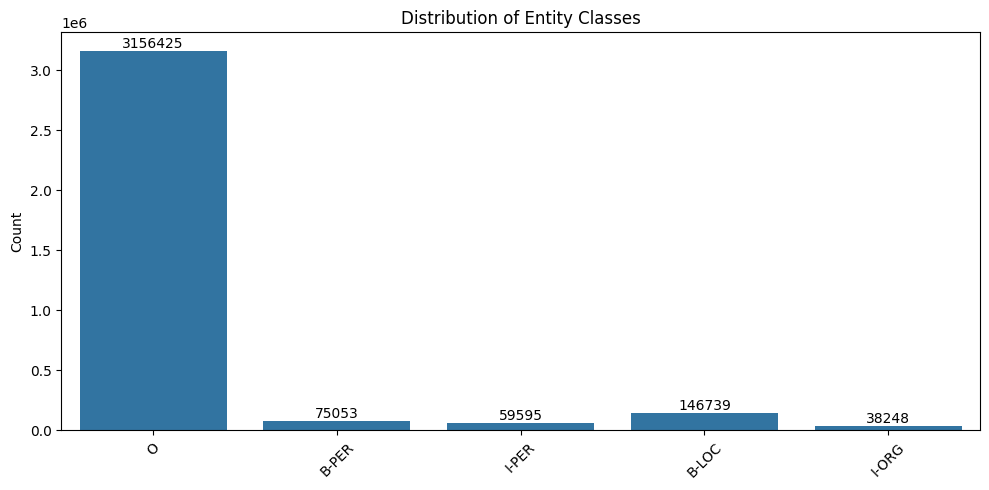

In [35]:
# Analyze the distribution of entity classes
all_tags = [tag for example in processed_data for tag in example['ner_tags']]
tag_counts = {label: all_tags.count(i) for i, label in enumerate(label_list)}

# Filter out classes with zero counts
filtered_tag_counts = {k: v for k, v in tag_counts.items() if v > 0}

# Plot only non-zero classes
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list(filtered_tag_counts.keys()), y=list(filtered_tag_counts.values()))
plt.xticks(rotation=45)
plt.title('Distribution of Entity Classes')
plt.ylabel('Count')

# Add exact counts on top of each bar
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()

plt.savefig(f'Results/{model_name}/entity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

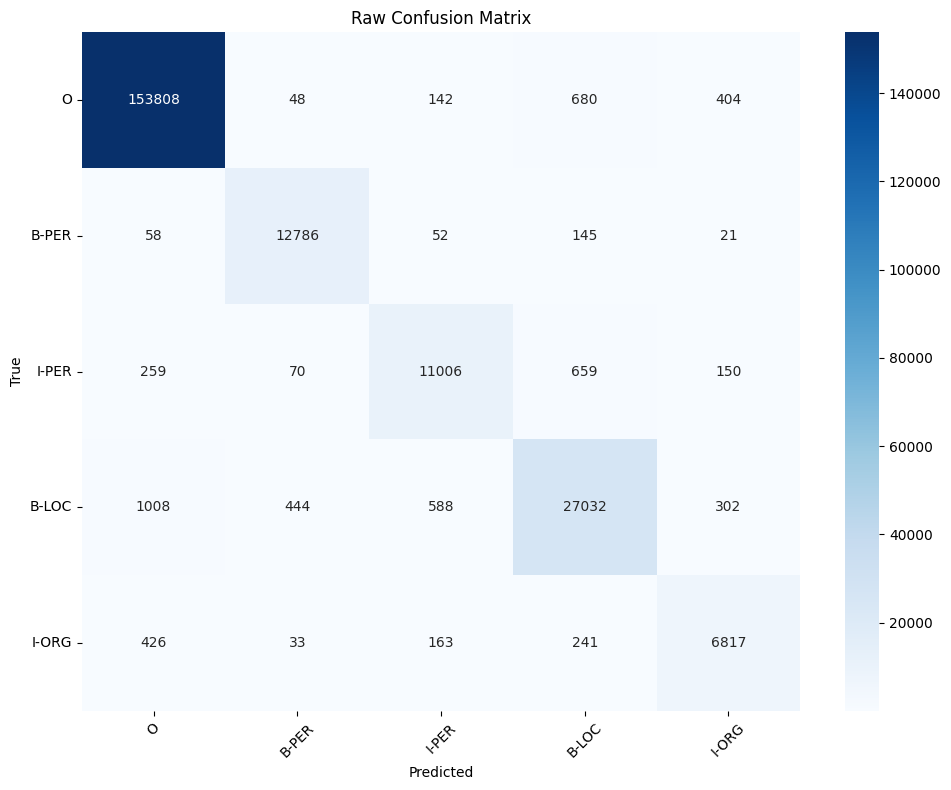

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions and labels
predictions = trainer.predict(tokenized_dataset['test'])
preds = np.argmax(predictions.predictions, axis=2)

# Flatten predictions and labels (ignore -100)
true_labels = []
true_preds = []
for pred, label in zip(preds, predictions.label_ids):
    for p, l in zip(pred, label):
        if l != -100:  # Skip padding tokens
            true_preds.append(p)
            true_labels.append(l)

# --- Define whether to normalize ---
NORMALIZE = False  # Set to False for raw counts

# Get active classes (remove unused ones)
active_classes = sorted(set(true_labels) | set(true_preds))
filtered_label_list = [label_list[i] for i in active_classes]

# Compute confusion matrix
cm = confusion_matrix(true_labels, true_preds, labels=active_classes)

# Normalize if enabled
if NORMALIZE:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Row-wise normalization
    fmt = '.2f'  # Show decimals for percentages
else:
    fmt = 'd'  # Show integers for raw counts

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt=fmt,
    xticklabels=filtered_label_list,
    yticklabels=filtered_label_list,
    cmap='Blues',
    cbar=False if NORMALIZE else True  # Hide colorbar for normalized
)
plt.title(f"{'Normalized' if NORMALIZE else 'Raw'} Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig(f'Results/{model_name}/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1200x600 with 0 Axes>

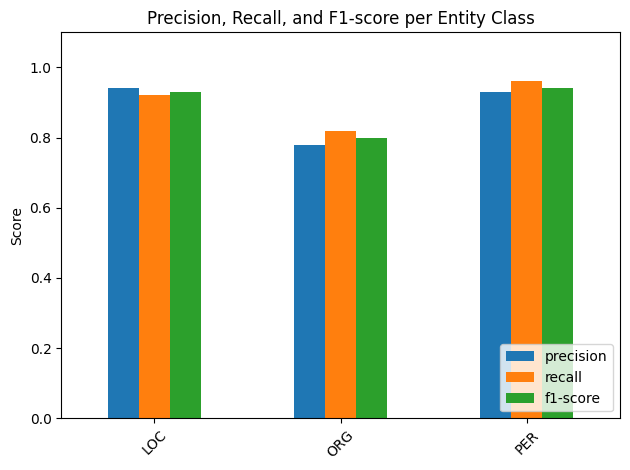

In [37]:
# Extract and visualize classification report
report = metrics['eval_report']

def parse_classification_report(report):
    """Parse classification report into a DataFrame"""
    if isinstance(report, dict):
        # Hugging Face's dictionary format
        return pd.DataFrame(report).transpose()
    else:
        # String format (traditional scikit-learn style)
        lines = [line.strip() for line in report.split('\n') if line.strip()]
        # Find the header line
        for i, line in enumerate(lines):
            if line.startswith('precision'):
                header = line.split()
                break
        else:
            raise ValueError("Could not parse classification report")

        data = []
        classes = []
        for line in lines[i+1:-3]:  # Skip header and summary lines
            parts = line.split()
            if len(parts) >= 5:  # Ensure we have all metrics
                classes.append(parts[0])
                data.append([float(x) for x in parts[1:4]])

        return pd.DataFrame(data, index=classes, columns=header[:3])

# Parse report
try:
    df_report = parse_classification_report(report)

    # Filter out non-class rows (like 'accuracy', 'macro avg', 'weighted avg')
    df_report = df_report.loc[~df_report.index.str.contains('avg|accuracy|total')]

    # Plot
    plt.figure(figsize=(12, 6))
    df_report[['precision', 'recall', 'f1-score']].plot(kind='bar')
    plt.title('Precision, Recall, and F1-score per Entity Class')
    plt.ylabel('Score')
    plt.ylim(0, 1.1)  # Set consistent y-axis
    plt.xticks(rotation=45)
    plt.legend(loc='lower right')
    plt.tight_layout()

    plt.savefig(f'Results/{model_name}/classification_report.png', dpi=300, bbox_inches='tight')
    plt.show()

except Exception as e:
    print(f"Error parsing report: {e}")
    print("Raw report content:")
    print(report)

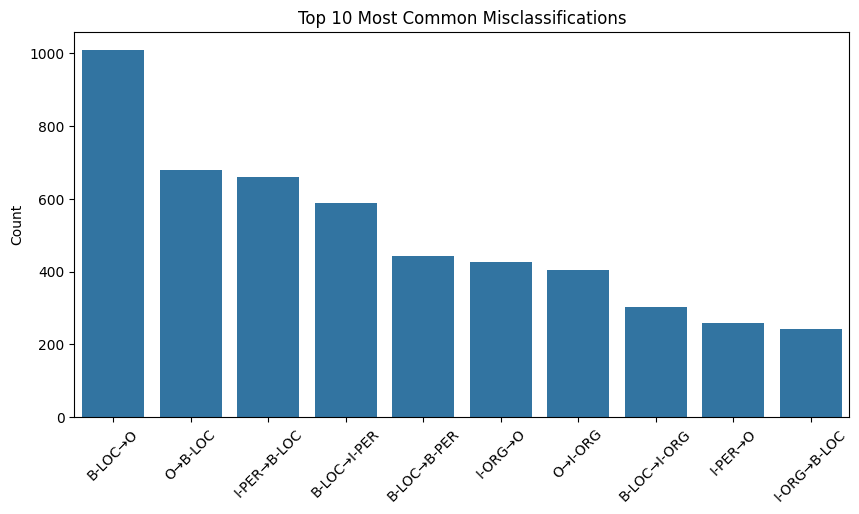

In [38]:
# Identify most common misclassifications
error_pairs = []
for true, pred in zip(true_labels, true_preds):
    if true != pred:
        error_pairs.append((label_list[true], label_list[pred]))

from collections import Counter
common_errors = Counter(error_pairs).most_common(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=[f"{true}→{pred}" for (true, pred), count in common_errors],
            y=[count for (true, pred), count in common_errors])
plt.xticks(rotation=45)
plt.title('Top 10 Most Common Misclassifications')
plt.ylabel('Count')

plt.savefig(f'Results/{model_name}/most_common_errors.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from spacy import displacy
from IPython.display import display

def visualize_ner(tokens, tags):
    entities = []
    current_entity = None

    for i, (token, tag_id) in enumerate(zip(tokens, tags)):
        tag = label_list[tag_id]  # Get tag name (e.g., "B-PER")

        # Skip O tags
        if tag == 'O':
            if current_entity is not None:
                entities.append(current_entity)
                current_entity = None
            continue

        # Extract entity type (remove B-/I- prefix)
        bio_prefix, entity_type = tag.split('-', 1) if '-' in tag else (None, tag)

        # New entity starts with B- or when entity type changes
        if bio_prefix == 'B' or (current_entity and current_entity[2] != entity_type):
            if current_entity is not None:
                entities.append(current_entity)
            current_entity = [i, i+1, entity_type]  # [start, end, type]
        # Continue existing entity
        elif current_entity is not None:
            current_entity[1] = i+1  # Update end position

    # Add the last entity if exists
    if current_entity is not None:
        entities.append(current_entity)

    # Format for displacy (with accurate token-based positions)
    displacy_text = " ".join(tokens)
    displacy_ents = []
    char_offset = 0

    # Calculate character positions
    for token, _ in zip(tokens, tags):
        token_start = displacy_text.find(token, char_offset)
        token_end = token_start + len(token)
        char_offset = token_end + 1  # +1 for space

    # Map entity token positions to character spans
    char_pos = 0
    token_positions = []
    for token in tokens:
        token_start = displacy_text.find(token, char_pos)
        token_end = token_start + len(token)
        token_positions.append((token_start, token_end))
        char_pos = token_end + 1

    # Create entities with correct character spans
    displacy_ents = []
    for start_idx, end_idx, label in entities:
        char_start = token_positions[start_idx][0]
        char_end = token_positions[end_idx-1][1]
        displacy_ents.append({
            "start": char_start,
            "end": char_end,
            "label": label
        })


    displacy_data = {
        "text": displacy_text,
        "ents": displacy_ents,
        "title": None
    }

    display(displacy.render(
        displacy_data,
        style="ent",
        manual=True,
    ))


# Visualize 3 examples
for i in range(87,90):
    example = tokenized_dataset['test'][i]
    tokens = example['tokens']
    tags = [t if t != -100 else 0 for t in example['labels']]  # Convert -100 to O
    print(f"\nExample {i+1}:")
    visualize_ner(tokens, tags)
    




example:  88



example:  89



example:  90
